# Examine distances

Examine the distances at which clusters are formed. The height increases monotonically, but the change in the number of clusters may reverse direction.

## Import libraries

In [1]:
from cyr2phon.cyrcluster import *
import matplotlib.pyplot as plt
from matplotlib import gridspec # supports different widths for subplots

## Function to generate report for each stanza

In [2]:
def examine_heights(df):
    stanzas = df.groupby(level=[0,1])
    c = 0
    for id, lines in stanzas:
        if c < ceiling:
            print(pd.concat([lines["Text"].str.replace(r"<[^>]+?>", ""), 
                             lines[["RhymeWord", "RhymeZone"]]], 
                            axis=1).to_string(index=False)) # diagnostic, suppress index for legibility
            data = lines.copy().filter(regex=r"^token\d_") # only one-hot features
            labelList = list(range(1, len(lines)+1)) # labels are line numbers within stanza
            data.loc[:,"LineNo"] = [2 * n / len(labelList) for n in labelList] # scale to avoid tyranny of proximity
            ward = linkage(data, method="ward")
            print(ward)
            fig = plt.figure(figsize=(15,5))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) # specify subplots of different widths
            ax = fig.add_subplot(gs[0])
            ax.set_title('Ward linkage')
            dendrogram(ward)
            ax = fig.add_subplot(gs[1])
            ax.set_title('Heights')
            # plot lines separately to label them
            x = range(len(ward))
            heights = ward[:, 2]
            nodecounts = ward[:, 3]
            ax.plot(x, heights, label=("height"))
            for i, j in zip(x, heights):
                ax.annotate(round(j, 2), xy=(i, j - 0.2))
            ax.plot(x, nodecounts, label=("number of nodes"))
            for i, j in zip(x, nodecounts):
                ax.annotate(int(j), xy=(i, j + 0.2))
            ax.legend(loc='best')
            plt.show()
        c += 1

## Get data

`explore()` returns a df

### Eugene Onegin

Test first with Onegin data, where rhymes are all paired

                            Text  RhymeWord RhymeZone
 "Мой дядя самых честных правил,     prAVil      AVil
       Когда не в шутку занемог,    zaNimOk        Ok
        Он уважать себя заставил   zastAVil      AVil
        И лучше выдумать не мог.      NimOk        Ok
        Его пример другим наука;      naUka       Uka
       Но, боже мой, какая скука      skUka       Uka
 С больным сидеть и день и ночь,       inOČ        OČ
        Не отходя ни шагу прочь!       prOČ        OČ
          Какое низкое коварство  kavArstva    Arstva
          Полу-живого забавлять,   zabavLAT        AT
         Ему подушки поправлять,  papravLAT        AT
   Печально подносить лекарство,  LikArstva    Arstva
     Вздыхать и думать про себя:    praSiBA        BA
    Когда же чорт возьмет тебя!"       TiBA        BA
[[ 4.          5.          0.14285714  2.        ]
 [ 9.         10.          0.14285714  2.        ]
 [ 6.          7.          0.14285714  2.        ]
 [12.         13.          0.14285714

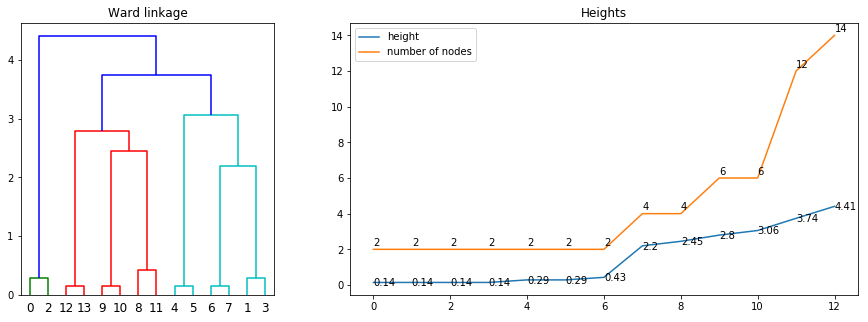

                          Text   RhymeWord RhymeZone
     Так думал молодой повеса,      paVEsa       Esa
      Летя в пыли на почтовых,  napaČtavIx        Ix
        Всевышней волею Зевеса      ZiVEsa       Esa
 Наследник всех своих родных.—      radnIx        Ix
     Друзья Людмилы и Руслана!    iruslAna       Ana
         С героем моего романа      ramAna       Ana
   Без предисловий, сей же час         ČAs        As
    Позвольте познакомить вас:         vAs        As
  Онегин, добрый мой приятель,    pRiJATiL      ATiL
       Родился на брегах Невы,        NivI        vI
   Где может быть родились вы,          vI        vI
   Или блистали, мой читатель;     ČitATiL      ATiL
        Там некогда гулял и я:         iJA        JA
     Но вреден север для меня.     DLiMiNA        NA
[[ 6.          7.          0.14285714  2.        ]
 [ 4.          5.          0.14285714  2.        ]
 [ 9.         10.          0.14285714  2.        ]
 [ 0.          2.          0.28571429  2.        ]
 

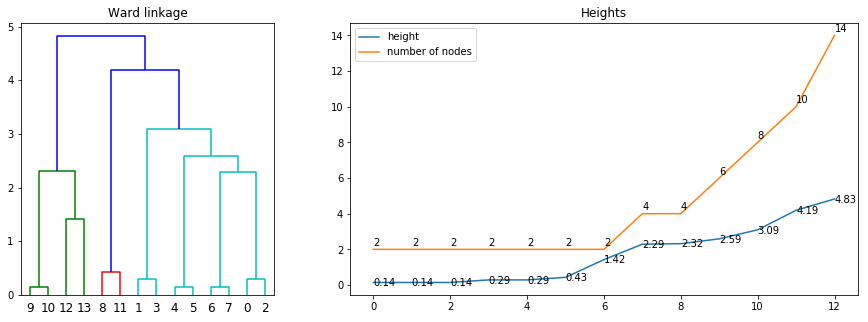

                              Text           RhymeWord RhymeZone
        Служив отлично-благородно,  aTLiČna-blagarOdna      Odna
             Долгами жил его отец,               aTEts       Ets
           Давал три бала ежегодно           JižigOdna      Odna
             И промотался наконец.            nakaNEts       Ets
           Судьба Евгения хранила:             xraNIla       Ila
      Сперва Madame за ним ходила,              xaDIla       Ila
         Потом Monsieur ее сменил;              sMiNIl        Il
        Ребенок был резов, но мил.               naMIl        Il
  Monsieur l'Abbé, француз убогой,              ubOgaJ      OgaJ
          Чтоб не измучилось дитя,                DiTA        TA
              Учил его всему шутя,                šuTA        TA
       Не докучал моралью строгой,             strOgaJ      OgaJ
         Слегка за шалости бранил,              braNIl        Il
      И в Летний сад гулять водил.               vaDIl        Il
[[ 4.          5.        

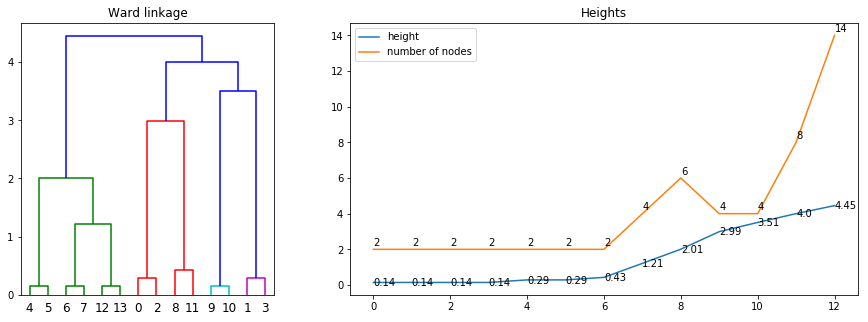

                           Text     RhymeWord RhymeZone
       Когда же юности мятежной      MiTEžnaJ     EžnaJ
           Пришла Евгению пора,          parA        rA
   Пора надежд и грусти нежной,        NEžnaJ     EžnaJ
    Monsieur прогнали со двора.       sadvarA        rA
     Вот мой Онегин на свободе;     nasvabODi       ODi
    Острижен по последней моде;          mODi       ODi
     Как dandy лондонской одет—          aDEt        Et
         И наконец увидел свет.          sVEt        Et
    Он по-французски совершенно     saViršEna       Ena
       Мог изьясняться и писал;        iPisAl        Al
        Легко мазурку танцовал,     tantsavAl        Al
      И кланялся непринужденно;  NipRinužDEna       Ena
 Чего ж вам больше? Свет решил,         RišIl        Il
       Что он умен и очень мил.           MIl        Il
[[ 6.          7.          0.14285714  2.        ]
 [ 4.          5.          0.14285714  2.        ]
 [ 9.         10.          0.14285714  2.        ]
 [12.  

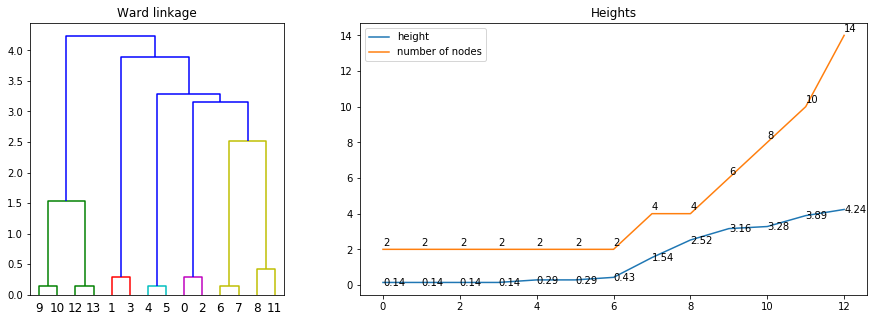

                             Text   RhymeWord RhymeZone
         Мы все учились понемногу   paNimnOgu       Ogu
        Чему-нибудь и как-нибудь,  ikak-NibUT        UT
     Так воспитаньем, слава богу,        bOgu       Ogu
        У нас немудрено блеснуть.     bLisnUT        UT
      Онегин был по мненью многих      mnOGix      OGix
    (Судей решительных и строгих)    istrOGix      OGix
         Ученый малый, но педант:    naPidAnt       Ant
        Имел он счастливый талант      talAnt       Ant
      Без принужденья в разговоре  vrazgavORi       ORi
       Коснуться до всего слегка,       SLikA        kA
          С ученым видом знатока      znatakA        kA
 Хранить молчанье в важном споре,       spORi       ORi
          И возбуждать улыбку дам         dAm        Am
        Огнем нежданных эпиграмм.     iPigrAm        Am
[[ 6.          7.          0.14285714  2.        ]
 [ 4.          5.          0.14285714  2.        ]
 [12.         13.          0.14285714  2.        ]
 [ 9.  

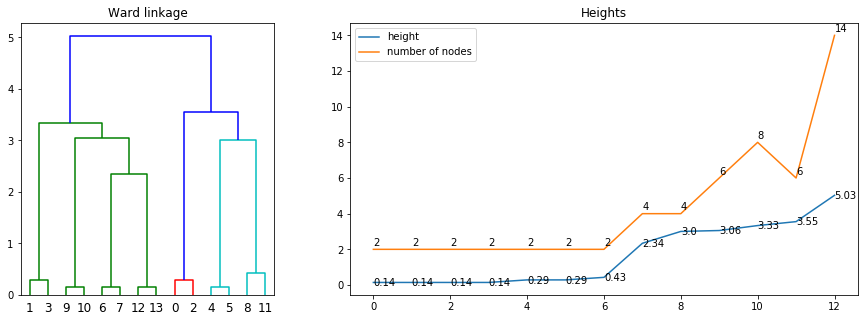

In [3]:
ceiling = 5
df = explore("data_samples/eo1.xml", ceiling=ceiling, ward=False)
examine_heights(df)

### Brjusov

In this Brjusov example, the rhyme scheme is AbCbbbb

                                                       Text RhymeWord RhymeZone
 Как-то в полночь, в час унылый, я вникал, устав, без силы,    BiSIli       Ili
           Меж томов старинных, в строки рассужденья одного    adnavO        vO
            По отвергнутой науке, и расслышал смутно звуки,     zvUKi       UKi
          Вдруг у двери словно стуки, — стук у входа моего.    maJivO        vO
       «Это — гость, — пробормотал я, — там, у входа моего.    maJivO        vO
                                ‎Гость, — и больше ничего!»    NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.10818511 2.        ]
 [8.         9.         4.4907312  6.        ]]


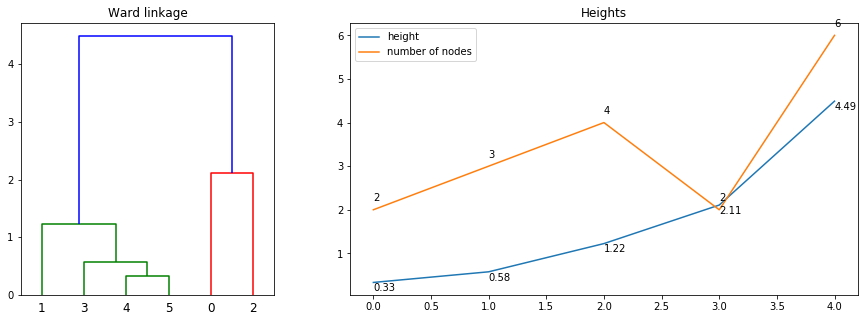

                                                     Text  RhymeWord RhymeZone
 Ах! мне помнится так ясно: был декабрь и день ненастный,  NinAstniJ    AstniJ
        Был как призрак — отсвет красный от камина моего.     maJivO        vO
       Ждал зари я в нетерпеньи, в книгах тщетно утешенье   uTišENJi      ENJi
  Я искал в ту ночь мученья, — бденья ночь, без той, кого       kavO        vO
            Звали здесь Линор. То имя… Шепчут ангелы его,       JivO        vO
                                  ‎На земле же — нет его.       JivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.10818511 2.        ]
 [8.         9.         4.4907312  6.        ]]


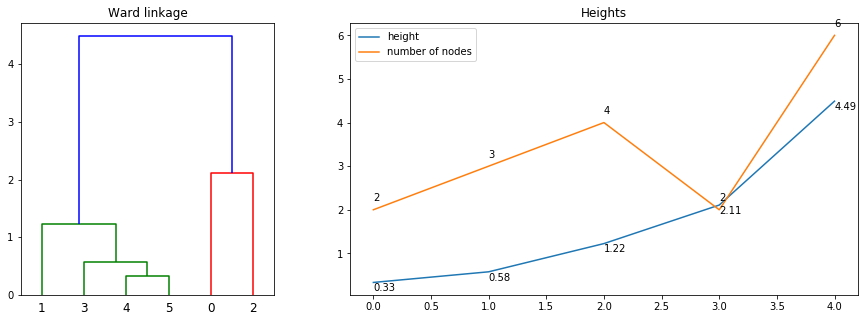

                                                 Text  RhymeWord RhymeZone
        Шелковистый и не резкий, шорох алой занавески  zanaVEsKi      EsKi
 Мучил, полнил темным страхом, что не знал я до того.     datavO        vO
  Чтоб смирить в себе биенья сердца, долго в утешенье  vuTišENJi      ENJi
     Я твердил: «То — посещенье просто друга одного.»     adnavO        vO
       Повторял: «То — посещенье просто друга одного,     adnavO        vO
                            ‎Друга, — больше ничего!»     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         1.56347192 2.        ]
 [8.         9.         4.63680925 6.        ]]


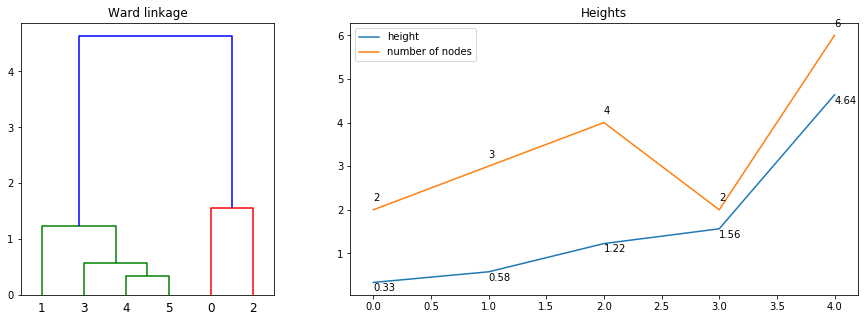

                                                Text  RhymeWord RhymeZone
     Наконец, владея волей, я сказал, не медля боле:       bOLi       OLi
  «Сэр иль Мистрисс, извините, что молчал я до того.     datavO        vO
 Дело в том, что задремал я, и не сразу расслыхал я,  raslixALi       ALi
     Слабый стук не разобрал я, стук у входа моего.»     maJivO        vO
          Говоря, открыл я настежь двери дома моего.     maJivO        vO
                           ‎Тьма, — и больше ничего.     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [0.         2.         1.20185043 2.        ]
 [1.         7.         1.22474487 4.        ]
 [8.         9.         4.26223728 6.        ]]


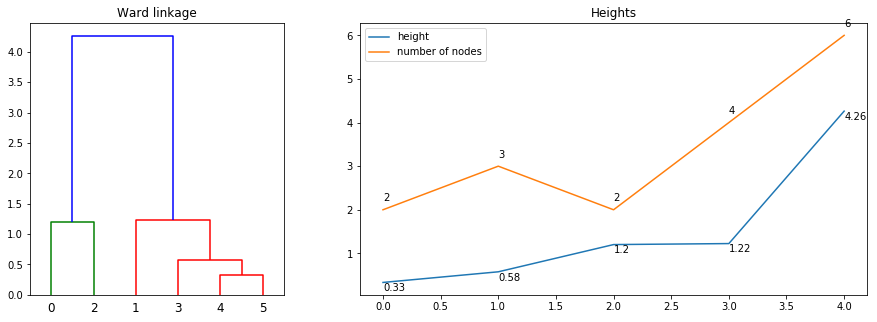

                                                  Text RhymeWord RhymeZone
   И, смотря во мрак глубокий, долго ждал я, одинокий,  aDinOKiJ      OKiJ
 Полный грез, что ведать смертным не давалось до того!    datavO        vO
    Все безмолвно было снова, тьма вокруг была сурова,    surOva       Ova
         Раздалось одно лишь слово: шепчут ангелы его.      JivO        vO
         Я шепнул: «Линор», и эхо — повторило мне его,      JivO        vO
                                ‎Эхо, — больше ничего.    NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.10818511 2.        ]
 [8.         9.         3.85140667 6.        ]]


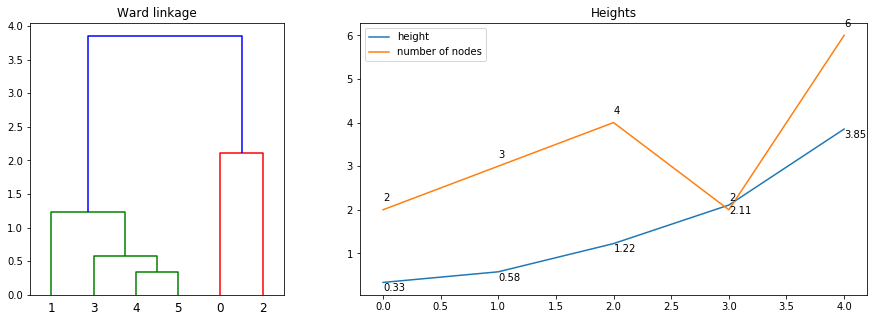

                                                  Text     RhymeWord RhymeZone
     Лишь вернулся я несмело (вся душа во мне горела),        gaREla       Ela
 Вскоре вновь я стук расслышал, но ясней, чем до того.        datavO        vO
   Но сказал я: «Это ставней ветер зыблет своенравней,  svaJinrAvNiJ     AvNiJ
    Он и вызвал страх недавний, ветер, только и всего,        ifSivO        vO
   Будь спокойно, сердце! Это — ветер, только и всего.        ifSivO        vO
                             ‎Ветер, — больше ничего!»        NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.33333333 2.        ]
 [8.         9.         4.26223728 6.        ]]


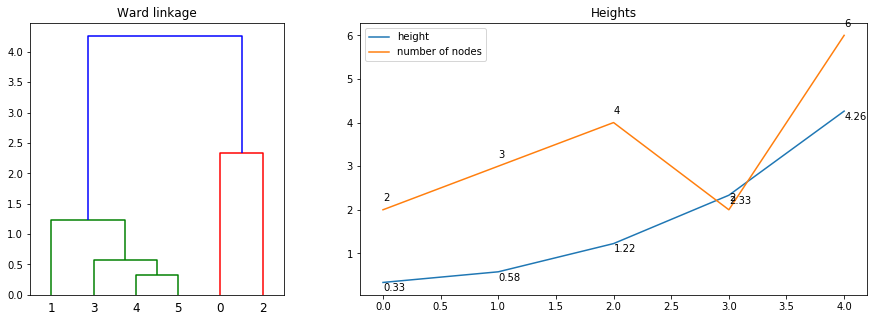

                                                   Text  RhymeWord RhymeZone
         Растворил свое окно я, и влетел во глубь покоя     pakOJi       OJi
 Статный, древний Ворон, шумом крыльев славя торжество.  taržistvO        vO
     Поклониться не хотел он; не колеблясь, полетел он,  paLiTElan      Elan
       Словно лорд иль лэди, сел он, сел у входа моего,     maJivO        vO
         Там, на белый бюст Паллады, сел у входа моего,     maJivO        vO
                               ‎Сел, — и больше ничего.     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.53859104 2.        ]
 [8.         9.         4.02077936 6.        ]]


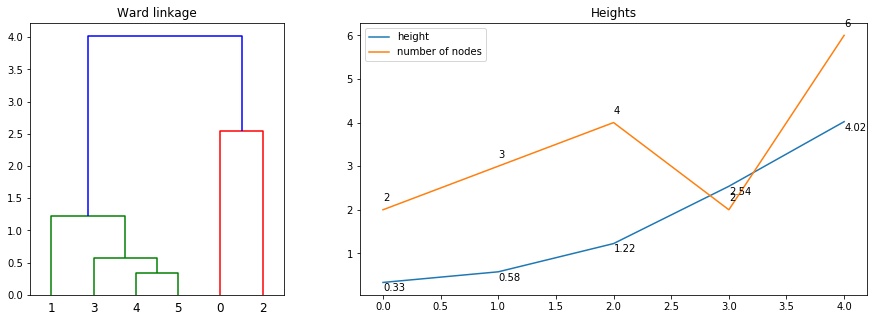

                                                         Text RhymeWord RhymeZone
                Я с улыбкой мог дивиться, как эбеновая птица,    pTItsa      Itsa
              В строгой важности — сурова и горда была тогда.     tagdA        dA
        «Ты, — сказал я, — лыс и черен, но не робок и упорен,   iupORin      ORin
 Древний, мрачный Ворон, странник с берегов, где ночь всегда!    fSigdA        dA
            Как же царственно ты прозван у Плутона?» Он тогда     tagdA        dA
                                  ‎Каркнул: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.72845092 2.        ]
 [8.         9.         3.76386326 6.        ]]


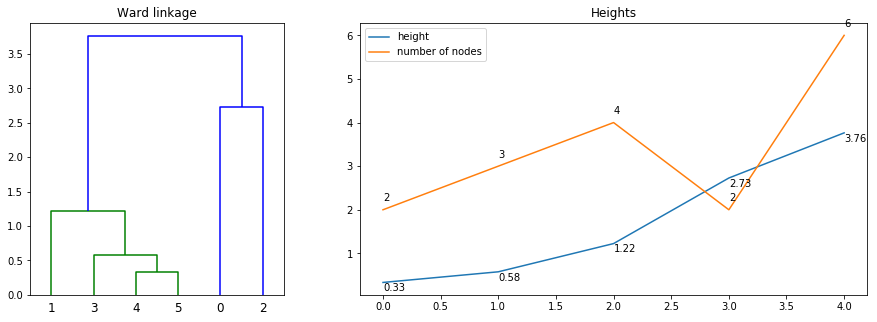

                                             Text  RhymeWord RhymeZone
      Птица ясно прокричала, изумив меня сначала.    snaČAla       Ala
   Было в крике смысла мало, и слова не шли сюда.       SudA        dA
 Но не всем благословенье было — ведать посещенье  paSiQENJi      ENJi
   Птицы, что над входом сядет, величава и горда,     igardA        dA
    Что на белом бюсте сядет, чернокрыла и горда,     igardA        dA
                     ‎С кличкой «Больше никогда!»    NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.10818511 2.        ]
 [8.         9.         3.48807492 6.        ]]


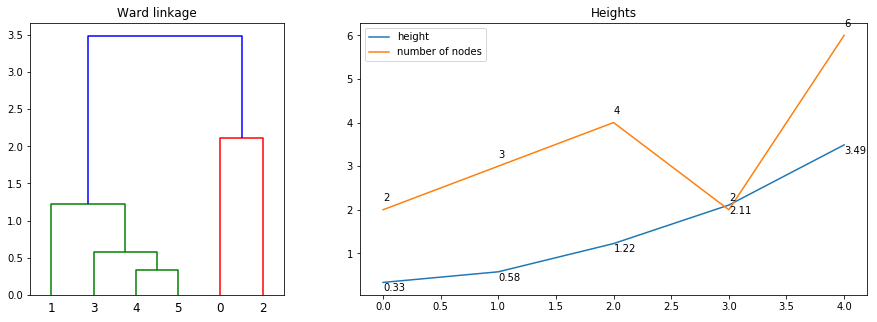

                                                   Text RhymeWord RhymeZone
  Одинокий, Ворон черный, сев на бюст, бросал, упорный,   upOrniJ     OrniJ
   Лишь два слова, словно душу вылил в них он навсегда.  nafSigdA        dA
 Их твердя, он словно стынул, ни одним пером не двинул,  NidVInul      Inul
     Наконец, я птице кинул: «Раньше скрылись без следа   BiSLidA        dA
  Все друзья; ты завтра сгинешь безнадежно!..» Он тогда     tagdA        dA
                            ‎Каркнул: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.72845092 2.        ]
 [8.         9.         4.10284454 6.        ]]


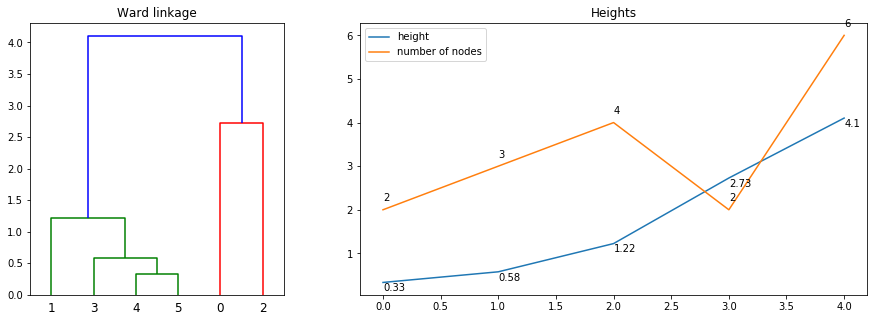

                                                       Text RhymeWord RhymeZone
 Вздрогнул я, в волненьи мрачном, при ответе столь удачном.   udAČnam     AČnam
    «Это — все, — сказал я, — видно, что он знает, жив года      gadA        dA
               С бедняком, кого терзали беспощадные печали,    PiČALi       ALi
               Гнали в даль и дальше гнали неудачи и нужда.    inuždA        dA
          К песням скорби о надеждах лишь один припев нужда     nuždA        dA
                                   ‎Знала: больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.33333333 2.        ]
 [8.         9.         3.58236421 6.        ]]


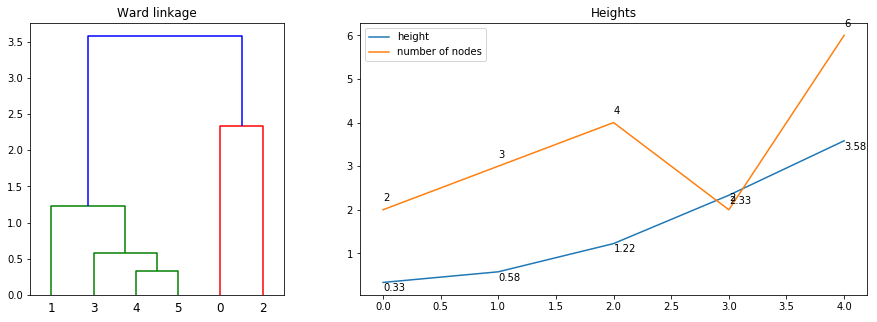

                                                   Text RhymeWord RhymeZone
 Я с улыбкой мог дивиться, как глядит мне в душу птица.    pTItsa      Itsa
      Быстро кресло подкатил я, против птицы, сел туда:      tudA        dA
   Прижимаясь к мягкой ткани, развивал я цепь мечтаний,  MiČtANiJ      ANiJ
     Сны за снами; как в тумане, думал я: «Он жил года,      gadA        dA
    Что ж пророчит, вещий, тощий, живший в старые года,      gadA        dA
                              ‎Криком: больше никогда?»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.33333333 2.        ]
 [8.         9.         3.58236421 6.        ]]


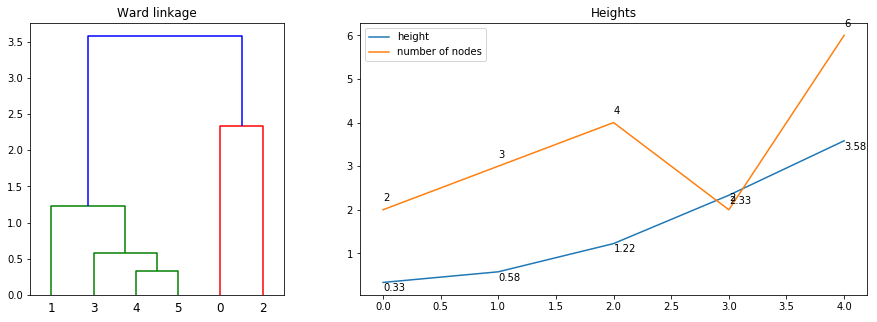

                                                Text RhymeWord RhymeZone
 Это думал я с тревогой, но не смел шепнуть ни слога   NislOga       Oga
     Птице, чьи глаза палили сердце мне огнем тогда.     tagdA        dA
          Это думал и иное, прислонясь челом в покое   fpakOJi       OJi
      К бархату; мы, прежде, двое так сидели иногда…    inagdA        dA
    Ах! при лампе, не склоняться ей на бархат иногда    inagdA        dA
                            ‎Больше, больше никогда!   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         1.56347192 2.        ]
 [8.         9.         3.67423461 6.        ]]


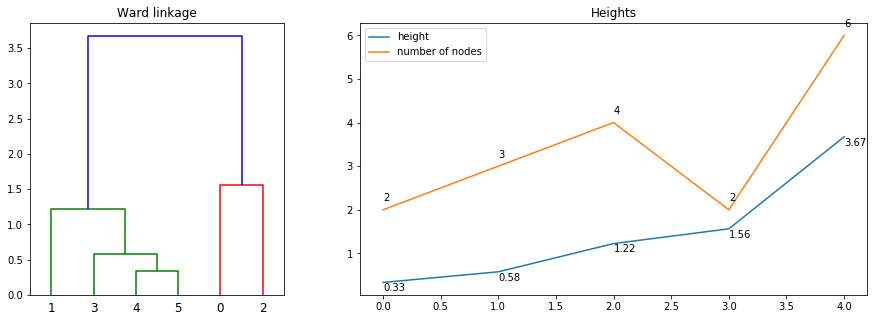

                                                          Text RhymeWord RhymeZone
              И, казалось, клубы дыма льет курильница незримо,   NizRIma       Ima
               Шаг чуть слышен серафима, с ней вошедшего сюда.      SudA        dA
 «Бедный! — я вскричал, — то богом послан отдых всем тревогам,  tRivOgam      Ogam
       Отдых, мир! чтоб хоть немного ты вкусил забвенье, — да?        dA        dA
       Пей! о, пей тот сладкий отдых! позабудь Линор, — о, да?       adA        dA
                                     ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.53859104 2.        ]
 [8.         9.         3.67423461 6.        ]]


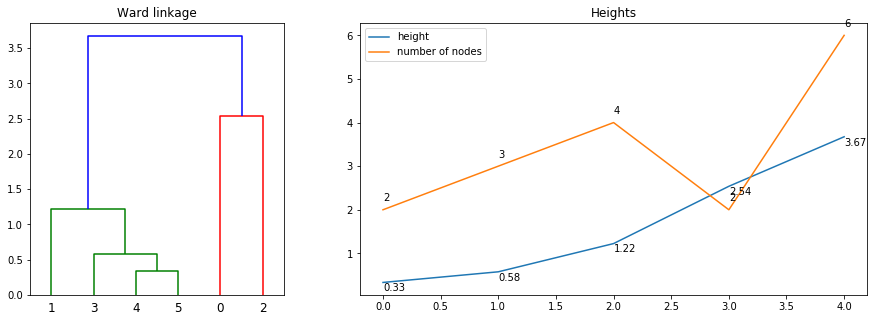

                                                      Text RhymeWord RhymeZone
 «Вещий, — я вскричал, — зачем он прибыл, птица или демон?  iLiDEman      Eman
             Искусителем ли послан, бурей пригнан ли сюда?      SudA        dA
     Я не пал, хоть полн уныний! В этой за́клятой пустыне,   pustINi       INi
         Здесь, где правит ужас ныне, отвечай, молю, когда     kagdA        dA
             В Галааде мир найду я? обрету бальзам когда?»     kagdA        dA
                                 ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.72845092 2.        ]
 [8.         9.         3.76386326 6.        ]]


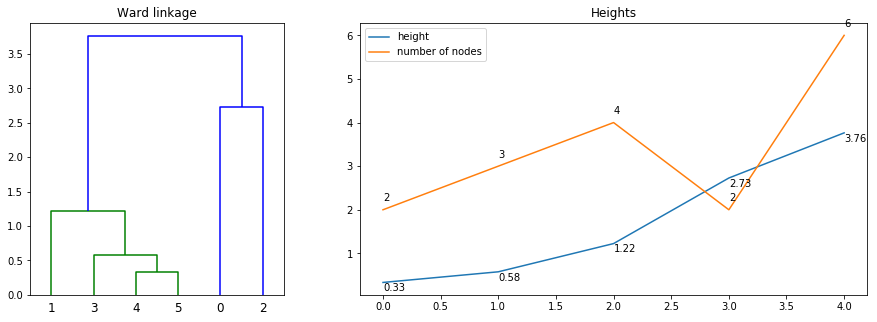

                                                      Text RhymeWord RhymeZone
 «Вещий, — я вскричал, — зачем он прибыл, птица или демон?  iLiDEman      Eman
             Ради неба, что над нами, часа страшного суда,      sudA        dA
       Отвечай душе печальной: я в раю, в отчизне дальной,    dALnaJ     ALnaJ
       Встречу ль образ идеальный, что меж ангелов всегда?    fSigdA        dA
              Ту мою Линор, чье имя шепчут ангелы всегда?»    fSigdA        dA
                                 ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.10818511 2.        ]
 [8.         9.         3.85140667 6.        ]]


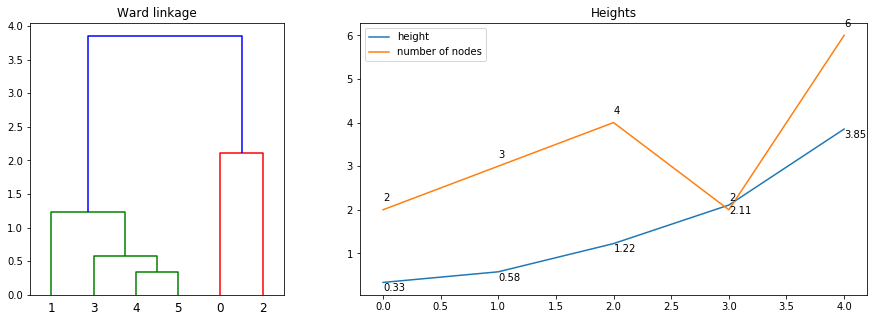

                                                         Text  RhymeWord RhymeZone
          «Это слово — знак разлуки! — крикнул я, ломая руки.       rUKi       UKi
          Возвратись в края, где мрачно плещет Стиксова вода!       vadA        dA
  Не оставь здесь перьев черных, как следов от слов позорных!   pazOrnix     Ornix
      Не хочу друзей тлетворных! С бюста — прочь, и навсегда!  inafSigdA        dA
 Прочь — из сердца клюв, и с двери — прочь виденье навсегда!»   nafSigdA        dA
                                    ‎Ворон: «Больше никогда!»    NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.53859104 2.        ]
 [8.         9.         4.02077936 6.        ]]


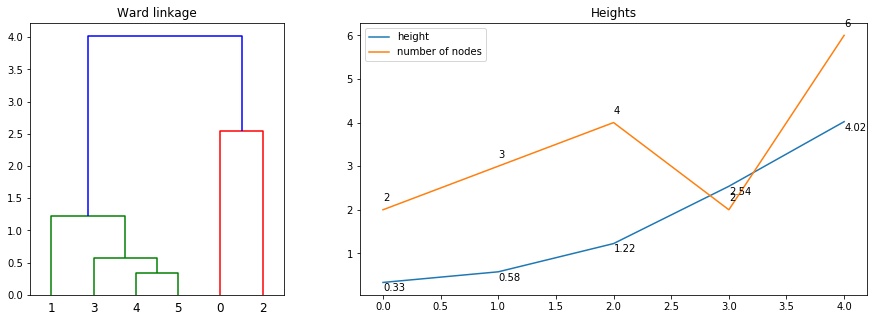

                                                       Text RhymeWord RhymeZone
 И, как будто с бюстом слит он, все сидит он, все сидит он,   SiDItan      Itan
 Там, над входом, Ворон черный, с белым бюстом слит всегда!    fSigdA        dA
      Светом лампы озаренный, смотрит, словно демон сонный.     sOniJ      OniJ
              Тень ложится удлиненно, на полу лежит года, —      gadA        dA
         И душе не встать из тени, пусть идут, идут года, —      gadA        dA
                                   ‎Знаю, — больше никогда!   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.         2.         2.53859104 2.        ]
 [8.         9.         4.02077936 6.        ]]


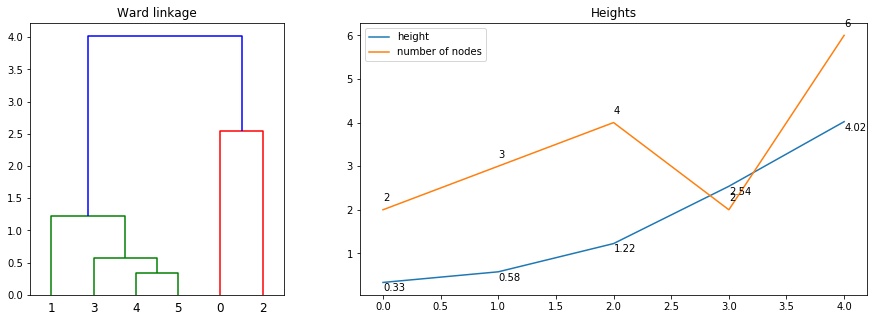

In [4]:
ceiling = 20 # get all 18 of them by setting ceiling > 18
df = explore("data_samples/brjusov_voron.xml", ceiling=ceiling, ward=False)
pd.set_option('display.width', 1000) # don't wrap long rows
pd.set_option('display.max_colwidth', 200) # don't truncate columns
examine_heights(df)
pd.set_option('display.width', 80) # restore default
pd.set_option('display.max_colwidth', 50) # restore default

## Axmatova

No open masculine rhyme, so no supporting consonants. Rhyme scheme should be ABCABCD

                              Text RhymeWord RhymeZone
       Он любил три вещи на свете:   nasVETi       ETi
 За вечерней пенье, белых павлинов  pavLInaf      Inaf
          И стертые карты Америки.   aMERiKi     ERiKi
      Не любил, когда плачут дети,      DETi       ETi
            Не любил чая с малиной  smaLInaJ      InaJ
               И женской истерики.  iSTERiKi     ERiKi
              …А я была его женой.     žinOJ        OJ
[[ 0.          3.          0.85714286  2.        ]
 [ 2.          5.          0.85714286  2.        ]
 [ 1.          4.          1.31707778  2.        ]
 [ 6.          7.          2.7454353   3.        ]
 [ 9.         10.          3.24278372  5.        ]
 [ 8.         11.          3.52946779  7.        ]]


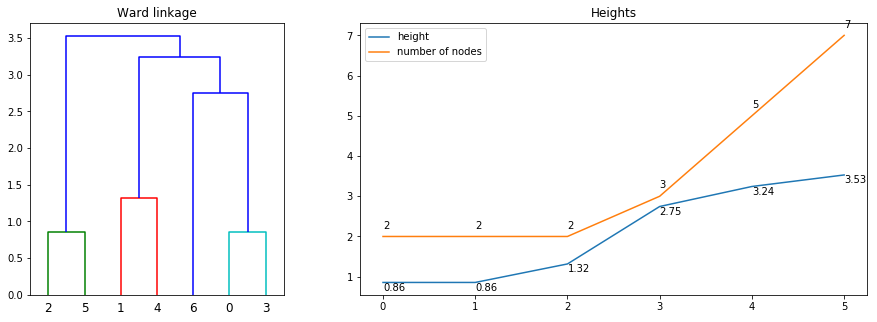

In [5]:
df = explore("data_samples/axmatova_on-ljubil.xml", ceiling=ceiling, ward=False)
examine_heights(df)